In [0]:
#importacion de librerias
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import seaborn as sns; sns.set(color_codes=True)

In [2]:
#lectura de archivos .csv y eliminaciond de la columna 'Unnamed: 0'
datocred = pd.read_csv('Credit.csv').drop(['Unnamed: 0'], axis=1)
datocred.head(1)


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333


In [3]:
#renombrar etiquetas
datocred = datocred.rename(columns ={'Unnamed':'N°','Income':'Ingreso_anual','Limit':'Limite_credito','Rating':'Ranking_credito','Cards':'Cantidad_tc','Age':'Edad','Education':'Años_educacion','Gender':'Hombre_o_mujer','Student':'Es_estudiante','Married':'casado','Ethnicity':'nacion','Balance':'Promedio_deuda_tc'})
datocred.dtypes

Ingreso_anual        float64
Limite_credito         int64
Ranking_credito        int64
Cantidad_tc            int64
Edad                   int64
Años_educacion         int64
Hombre_o_mujer        object
Es_estudiante         object
casado                object
nacion                object
Promedio_deuda_tc      int64
dtype: object

In [4]:
datocred00 = pd.get_dummies(datocred, drop_first=True)
datocred00.dtypes

Ingreso_anual            float64
Limite_credito             int64
Ranking_credito            int64
Cantidad_tc                int64
Edad                       int64
Años_educacion             int64
Promedio_deuda_tc          int64
Hombre_o_mujer_Female      uint8
Es_estudiante_Yes          uint8
casado_Yes                 uint8
nacion_Asian               uint8
nacion_Caucasian           uint8
dtype: object

# **1**
 Realizar un análisis exploratorio de los datos identificando la presencia de datos nulos y establezca una normativa para tratar dichos datos, identificar variables categóricas y cuantitativas.


In [5]:
#revisar datos nulos de df
null = datocred.isnull().sum().to_frame(name = 'NAN')
null['Porcentaje'] = (null['NAN']/len(datocred)*100)
null

,NAN,Porcentaje
Ingreso_anual,0,0.0
Limite_credito,0,0.0
Ranking_credito,0,0.0
Cantidad_tc,0,0.0
Edad,0,0.0
Años_educacion,0,0.0
Hombre_o_mujer,0,0.0
Es_estudiante,0,0.0
casado,0,0.0
nacion,0,0.0


# **2**
Identifique y establezca un protocolo para tratar outliers.


,Nulos,% Nulos,Outliers,% Outliers
Ingreso_anual,0,0.0,0,0.0
Limite_credito,0,0.0,2,0.0
Ranking_credito,0,0.0,0,0.0
Cantidad_tc,0,0.0,0,0.0
Edad,0,0.0,0,0.0
Años_educacion,0,0.0,9,2.0
Hombre_o_mujer,0,0.0,4,1.0
Es_estudiante,0,0.0,1,0.0
casado,0,0.0,4,1.0
nacion,0,0.0,0,0.0


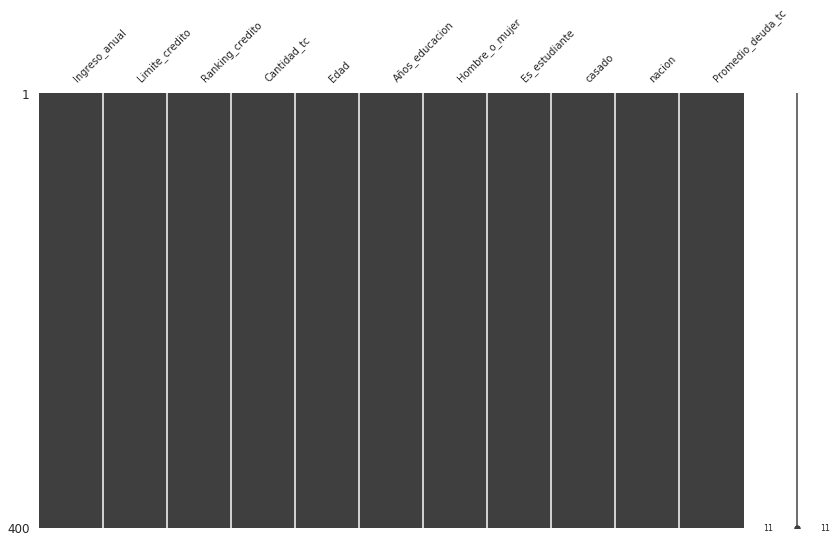

In [6]:
 def nulos_out(partidoscopa,i=None):
   """Formula para calcular datos nulos y outliers, 
   y mostrarlo en una tabla de cualquier dataframe con una desviación 
   estandar de 3+- """
   a = datocred.isnull().sum().to_frame(name='Nulos')#sumamos los nulos
   a['% Nulos'] = ((a['Nulos']/len(datocred))*100).round()#porcentaje

 #Buscar outliers
   media=np.mean(datocred.iloc[:,:])#media general dataframe
   des_std=np.std(datocred.iloc[:,:])#desviacion estandar
   g=des_std*3
   ss=np.where((datocred.iloc[:,:]<media-(g)) | (datocred.iloc[:,:]>media+(g)),True,False)#identificamos los datos outliers
   df3=pd.DataFrame(ss)#lo dejamos como un dataframe
   df5=df3.sum(axis = 0, skipna = True)
   list_out=list(df5)
   a["Outliers"] = list_out#creamos una columna llamado outliers que nos mostrara la cantidad
   a['% Outliers'] = ((a['Outliers']/len(datocred))*100).round()#creamos la columna con % de outliers
   b=msno.matrix(datocred,figsize = (14,8), fontsize = 10);# grafico misigno
   try:#intentamos con try si analizamos un dataframe junto con una columna
     c=datocred[(datocred[i]>g[i]+media[i])|(datocred[i]<media[i]-g[i])]#valores ouliers con media y desviacion de la misma columna
     d=datocred[i].mean()#media de la columna a trabajar
   except:
     c=None
     d=None
   return a,b,c,d
a,b,c,d=nulos_out(datocred,'Edad')
a

In [7]:
datocred.head(1)

,Ingreso_anual,Limite_credito,Ranking_credito,Cantidad_tc,Edad,Años_educacion,Hombre_o_mujer,Es_estudiante,casado,nacion,Promedio_deuda_tc
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333


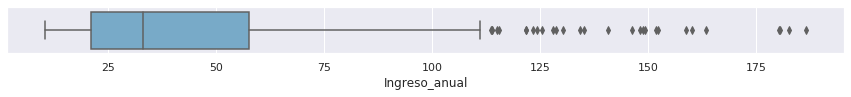

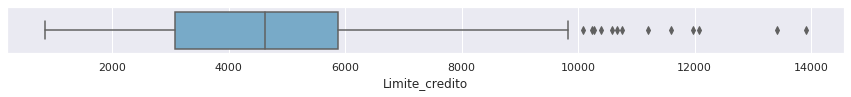

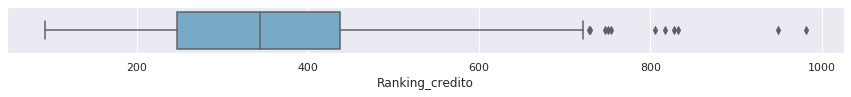

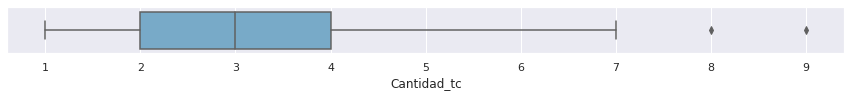

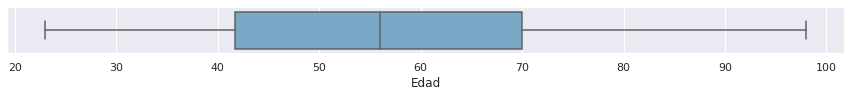

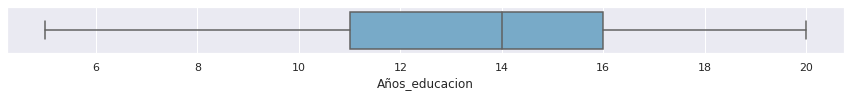

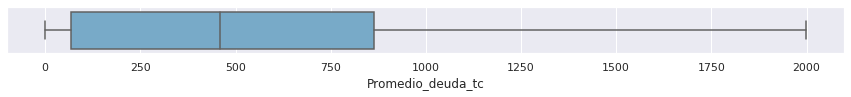

In [8]:
#funcion que permite visualizar Outliers de las distintas variables cuantitativas a traves de los boxplot 
out_credito = datocred[['Ingreso_anual', 'Limite_credito', 'Ranking_credito', 'Cantidad_tc','Edad','Años_educacion','Promedio_deuda_tc']]
for i, col in enumerate(out_credito):
    plt.figure(figsize=(15,8))
    plt.subplot(8,1,i+1)
    sns.boxplot(out_credito[col], palette=('Blues'))

# **3**
 Generar análisis exploratorio basándose en variables de su interés

In [0]:
#help(datocred.groupby)

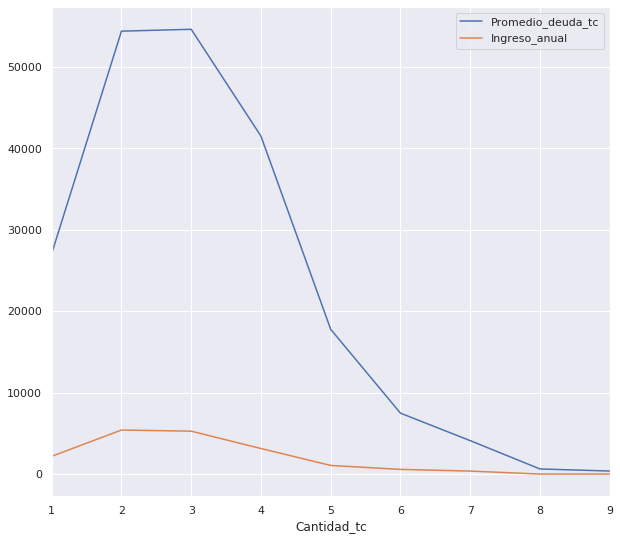

In [10]:
# analisis de cantidad de tc v/s promedio deuda en tc y los ingresos anuales
analisis = datocred.groupby(['Cantidad_tc'])['Promedio_deuda_tc','Ingreso_anual'].sum().plot(figsize=(10,9));#.sort_values(ascending=False)

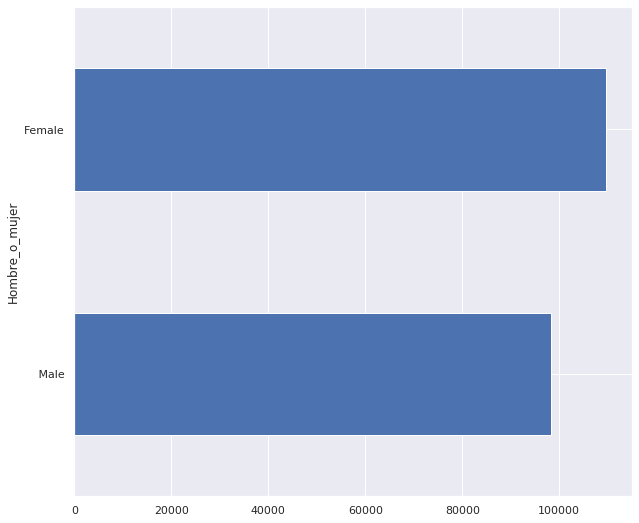

In [11]:
#demostrar que genero tiende a endeudarse mas
datocred.groupby(['Hombre_o_mujer'])['Promedio_deuda_tc'].sum().plot.barh(figsize=(10,9)) 

# **4**
Generar análisis de correlación. Generar Matriz y scatterplots.

Text(0.5, 1, 'matriz de correlacion')

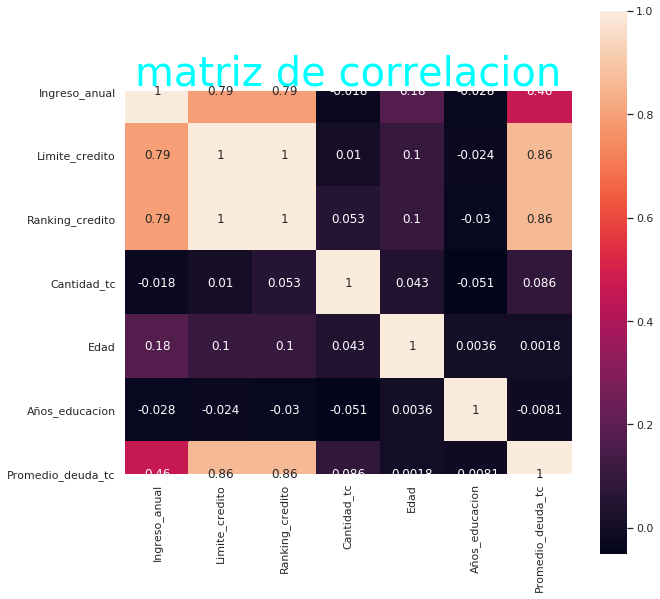

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(datocred.corr(), square=True, annot=True)
plt.title('matriz de correlacion', fontsize=40, color='aqua')

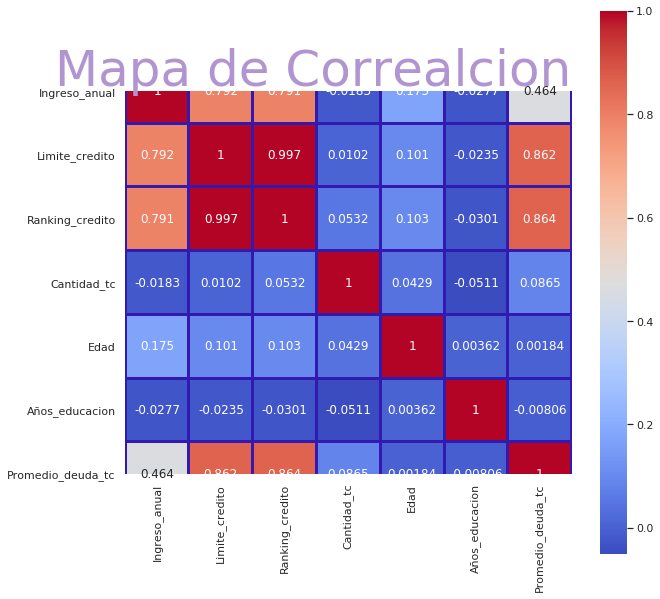

In [13]:
maxcorr=datocred.corr()
plt.figure(figsize=(10,10));
sns.heatmap(maxcorr,cmap='coolwarm',annot=True,linecolor='#3219AF',linewidths=2,fmt='.3g', square=True,);
plt.title('Mapa de Correalcion',fontsize=50,color='#B295D0',loc='right',);

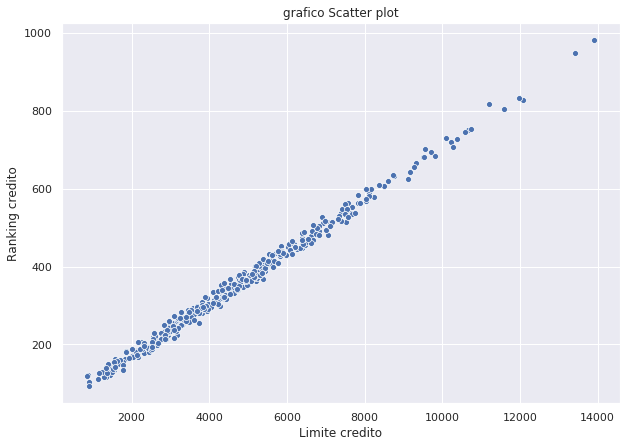

In [14]:
plt.figure(figsize=(10,7))
sns.scatterplot("Limite_credito", "Ranking_credito", data=datocred);
plt.title('grafico Scatter plot')
plt.xlabel('Limite credito')
plt.ylabel('Ranking credito')
plt.show()

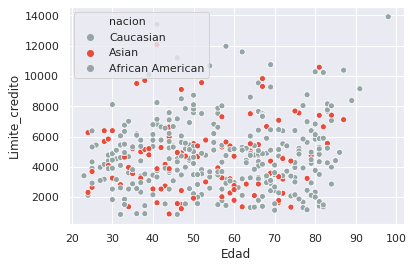

In [15]:
sns.scatterplot(x='Edad',y='Limite_credito',hue='nacion',palette=('#95a5a6','#e74c3c'), data=datocred);

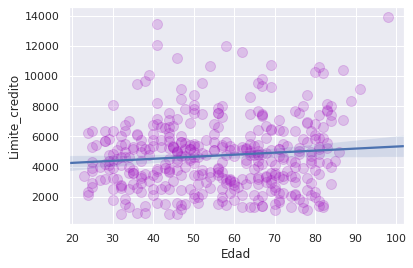

In [16]:
sns.regplot(x=datocred["Edad"], y=datocred["Limite_credito"], fit_reg=True, scatter_kws={"color":"#A215C2","alpha":0.2,"s":100} );

# **5**
Generar una función que dibuje un histograma y que además identifique de manera visual la media y mediana. Esta función debe ser aplicada para las variables ‘Balance’, ‘Income’, ‘Rating’ y ‘cards’. Según los gráficos generados, como es el comportamiento de estas variables.


In [0]:
# función que dibuja histograma y que identifica de manera visual la media y mediana
def histograma(df,etiqueta,ejex,ejey):
  dfe=df[etiqueta]
  media=np.mean(dfe)
  std=np.std(dfe)
  dff=dfe[dfe.notnull()]
  N=dff.shape[0]
  k=int(1+np.log2(N))
  if k%2==0:
    k+=1
  mediana=np.median(dff)
  media=np.mean(dff)
  graf=dff.plot(kind='hist',figsize=(14,8),bins=k).set_title('Gráfico de distribución de frecuencia {0}'.format(etiqueta),fontsize=20)
  plt.xlabel(ejex)
  plt.ylabel(ejey)
  plt.axvline(mediana,linestyle='-.',color='red',label='Mediana')
  plt.axvline(media,linestyle='--',color='green',label='Media')
  plt.legend()
  plt.show(graf)
  return graf

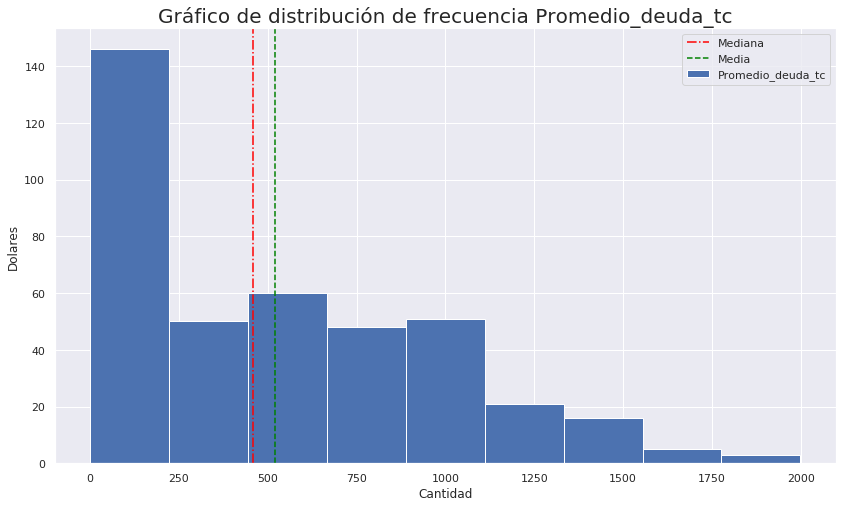

Text(0.5, 1, 'Gráfico de distribución de frecuencia Promedio_deuda_tc')

In [18]:
histograma(datocred,'Promedio_deuda_tc','Cantidad','Dolares')

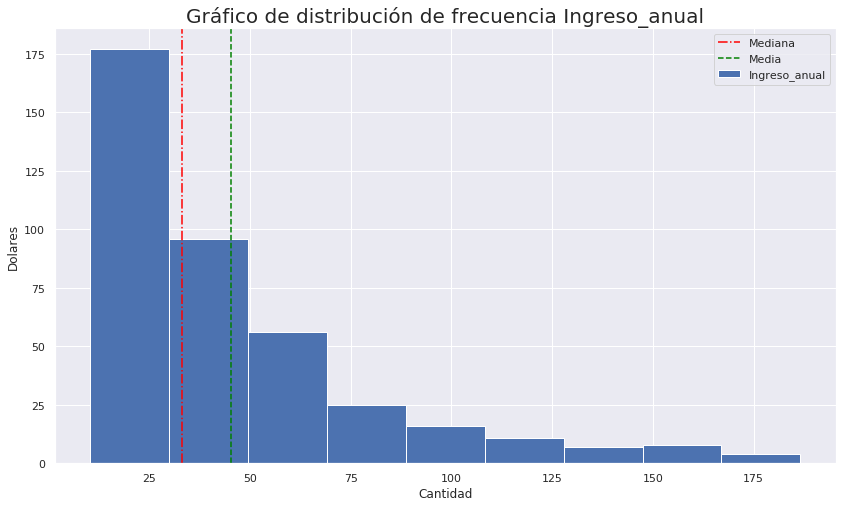

Text(0.5, 1, 'Gráfico de distribución de frecuencia Ingreso_anual')

In [19]:
histograma(datocred,'Ingreso_anual','Cantidad','Dolares')

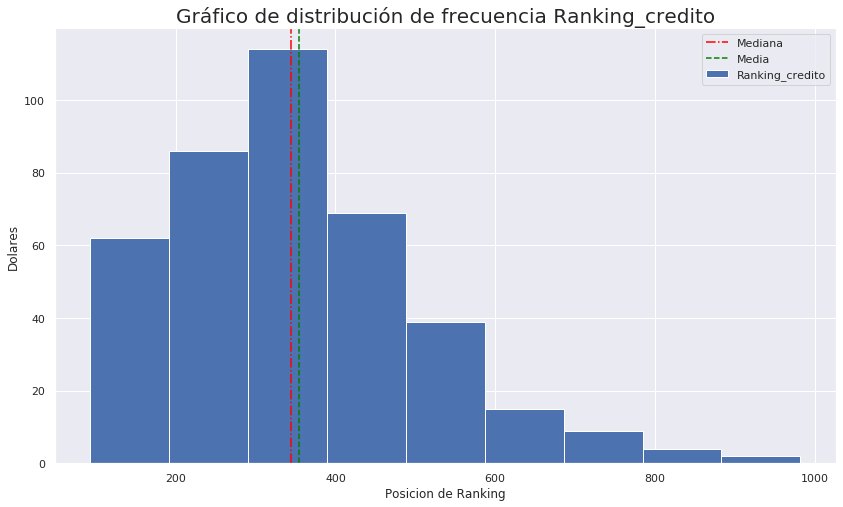

Text(0.5, 1, 'Gráfico de distribución de frecuencia Ranking_credito')

In [20]:
histograma(datocred,'Ranking_credito','Posicion de Ranking','Dolares')

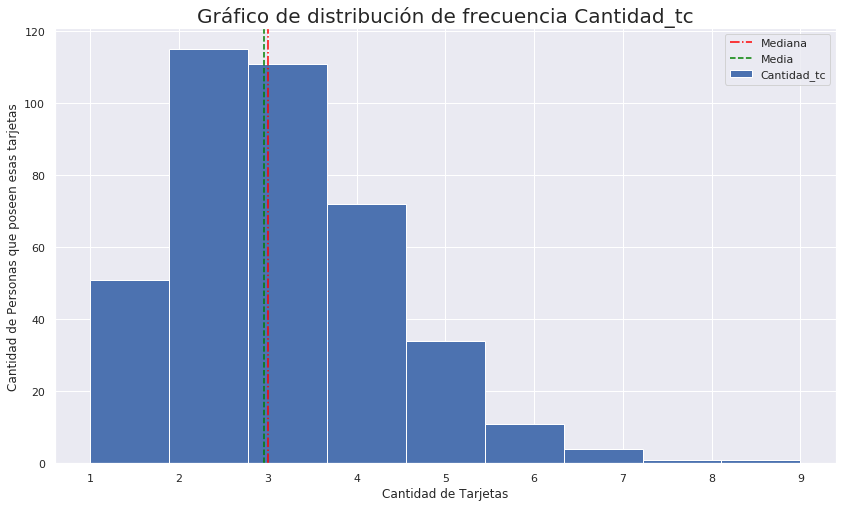

Text(0.5, 1, 'Gráfico de distribución de frecuencia Cantidad_tc')

In [21]:
histograma(datocred,'Cantidad_tc','Cantidad de Tarjetas','Cantidad de Personas que poseen esas tarjetas')

# **6**
**Regresión Lineal**

Generar 3 regresiones lineales simple para la variable “Balance” (variable dependiente) utilizando como variables independientes  ‘Student’, ‘Income’, ‘Rating’ respectivamente (una para cada regresión). Identificar coeficientes de la recta y ver cuales de estas tres explica de mejor forma el fenómeno.


In [22]:
# modelo de regresion lineal simple para la variable dependiene "Promedio_deuda_tc" y las variables independientes Años_educacion + Ingreso_anual + Ranking_credito
modelo = smf.ols(formula= 'Promedio_deuda_tc ~  + Años_educacion + Ingreso_anual + Ranking_credito', data=datocred).fit()
print (modelo.params)
m=modelo.summary()
print(m)


Intercept         -566.374582
Años_educacion       2.312446
Ingreso_anual       -7.670016
Ranking_credito      3.950292
dtype: float64
                            OLS Regression Results                            
Dep. Variable:      Promedio_deuda_tc   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     927.1
Date:                Fri, 22 Nov 2019   Prob (F-statistic):          1.29e-178
Time:                        06:19:08   Log-Likelihood:                -2602.9
No. Observations:                 400   AIC:                             5214.
Df Residuals:                     396   BIC:                             5230.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025    

In [0]:
# modelo1 = smf.ols(formula= 'Promedio_deuda_tc ~ Años_educacion', data=datocred).fit()
# modelo2 = smf.ols(formula= 'Promedio_deuda_tc ~ Ingreso_anual', data=datocred).fit()
# modelo3 = smf.ols(formula= 'Promedio_deuda_tc ~ Ranking_credito', data=datocred).fit()
# print (modelo1.params)
# print (modelo2.params)
# print (modelo3.params)
# m1=modelo1.summary()
# m2=modelo2.summary()
# m3=modelo3.summary()
# print(m1)

# **7**
Genere una nueva regresión lineal utilizando todos los regresores (todas las columnas). Indique cuales son sus coeficientes. ¿Cual es el que más repercute en el modelo?

In [24]:
# modelo de regresion lineal simple para la variable dependiene "Promedio_deuda_tc" y todas las variables independientes 
modelos = smf.ols(formula= 'Promedio_deuda_tc ~ Ingreso_anual + Limite_credito + Ranking_credito + Cantidad_tc + Edad + Años_educacion + Hombre_o_mujer+ Es_estudiante + casado + nacion', data=datocred).fit()
mo1=modelos.summary()
print(mo1)

                            OLS Regression Results                            
Dep. Variable:      Promedio_deuda_tc   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Fri, 22 Nov 2019   Prob (F-statistic):          1.11e-253
Time:                        06:19:08   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

¿Cual es el que más repercute en el modelo?

**Respuesta**

In [25]:
repercute = smf.ols(formula= 'Promedio_deuda_tc ~ Ranking_credito', data=datocred).fit()
mo4=repercute.summary()
print(mo4)

                            OLS Regression Results                            
Dep. Variable:      Promedio_deuda_tc   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Fri, 22 Nov 2019   Prob (F-statistic):          1.90e-120
Time:                        06:19:08   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -390.8463     29.069    -

# **8**
Utilizando `lmplot` de `seaborn`, inspeccione el comportamiento de los tres principales determinantes. ¿Qué comportamiento observa?.

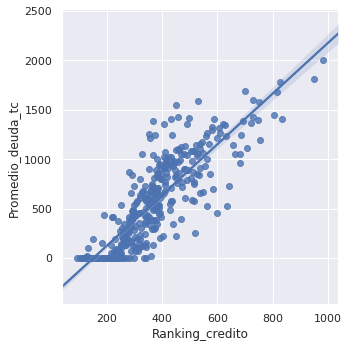

In [26]:
sns.lmplot(x="Ranking_credito", y="Promedio_deuda_tc", data=datocred);

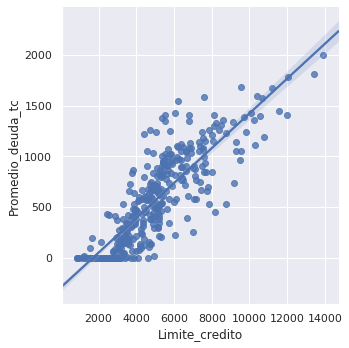

In [27]:
sns.lmplot(x="Limite_credito", y="Promedio_deuda_tc", data=datocred);

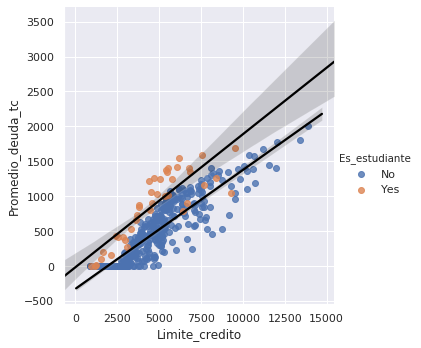

In [28]:
sns.lmplot(x="Limite_credito", y="Promedio_deuda_tc", hue='Es_estudiante', data=datocred, line_kws={'color': 'black'});

# **9**
**Bonus:** 

Depure el modelo utilizando solo los regresores más significativos (pvalues =< 0.025) Genere un nuevo modelo con solo estos regresores. ¿Qué diferencias encuentra con respecto al modelo de la pregunta 7.?


In [29]:
#modelo utilizando solo los regresores más significativos (pvalues =< 0.025)
modelos2 = smf.ols(formula= 'Promedio_deuda_tc ~ Ingreso_anual + Limite_credito + Ranking_credito + Es_estudiante', data=datocred).fit()
mo2=modelos2.summary()
print(mo2)

                            OLS Regression Results                            
Dep. Variable:      Promedio_deuda_tc   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1967.
Date:                Fri, 22 Nov 2019   Prob (F-statistic):          3.06e-259
Time:                        06:19:11   Log-Likelihood:                -2411.3
No. Observations:                 400   AIC:                             4833.
Df Residuals:                     395   BIC:                             4852.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -516.7183 

¿Qué diferencias encuentra con respecto al modelo de la pregunta 7.?

**Respuesta:**

las variables mas significativas en su relacion con la recta son las Ingreso_anual + Limite_credito + Ranking_credito + Es_estudiante' obteniendo un R-squared: 0.952, a comparacion de la 7 que se deben usar mucho mas variables para solo llegar al R-squared: 0.955